# DataViz 250 bird species

In [31]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from datetime import datetime
import matplotlib.pyplot as plt
###
from keras.preprocessing.image import load_img,img_to_array, ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

dirs = os.listdir('/content/drive/My Drive/TPCN')
print(dirs)

Mounted at /content/drive
['resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', 'dataset.zip', 'datasetttt', 'weights.best.hdf5']


In [3]:
!unzip -q '/content/drive/My Drive/TPCN/dataset.zip'

In [4]:
trainDirectory = os.listdir('dataset/train')
species = trainDirectory
trainLabels = species
print(trainLabels)

['OYSTER CATCHER', 'FLAMINGO', 'HOOPOES', 'IMPERIAL SHAQ', 'GUINEAFOWL', 'SUPERB STARLING', 'PELICAN', 'INDIAN BUSTARD', 'GRAY CATBIRD', 'RED HEADED WOODPECKER', 'GAMBELS QUAIL', 'JAVA SPARROW', 'SORA', 'RAZORBILL', 'WILSONS BIRD OF PARADISE', 'OKINAWA RAIL', 'SAND MARTIN', 'FLAME TANAGER', 'PURPLE MARTIN', 'SRI LANKA BLUE MAGPIE', 'EASTERN TOWEE', 'GRAY PARTRIDGE', 'AFRICAN CROWNED CRANE', 'RUFUOS MOTMOT', 'HOUSE SPARROW', 'CUBAN TODY', 'ANNAS HUMMINGBIRD', 'VENEZUELIAN TROUPIAL', 'NORTHERN MOCKINGBIRD', 'BAR-TAILED GODWIT', 'RED HONEY CREEPER', 'KILLDEAR', 'OSPREY', 'EURASIAN GOLDEN ORIOLE', 'ROSY FACED LOVEBIRD', 'INDIAN PITTA', 'ALEXANDRINE PARAKEET', 'CALIFORNIA CONDOR', 'WOOD DUCK', 'BLACK-NECKED GREBE', 'BARN SWALLOW', 'GREEN JAY', 'PUFFIN', 'CHUKAR PARTRIDGE', 'CROWNED PIGEON', 'CARMINE BEE-EATER', 'BANANAQUIT', 'BOBOLINK', 'BLACK SWAN', 'RAINBOW LORIKEET', 'COMMON STARLING', 'MALLARD DUCK', 'NICOBAR PIGEON', 'MALEO', 'LONG-EARED OWL', 'SNOWY OWL', 'ANTBIRD', 'D-ARNAUDS BARBET'

In [5]:
nSpecies = len(np.unique(species))
print('Number of species for train:', nSpecies)

Number of species for train: 250


In [6]:
testSpecies = os.listdir('dataset/test')
testLabels = testSpecies
print('Number of test species:',len(np.unique(testSpecies)))

valid = os.listdir('dataset/valid')
validationLabels = valid
print('Number of validation species:',len(np.unique(valid)))

Number of test species: 250
Number of validation species: 250


#### Print one of the training images

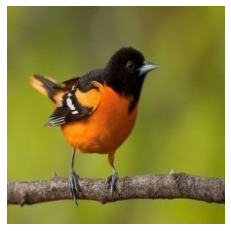

Image size + color channels: (224, 224, 3)


In [7]:
img = load_img('dataset/train/BALTIMORE ORIOLE/027.jpg')
plt.imshow(img)
plt.axis("off")
plt.show()

imgData = img_to_array(img)
shape = imgData.shape
print('Image size + color channels:', shape)

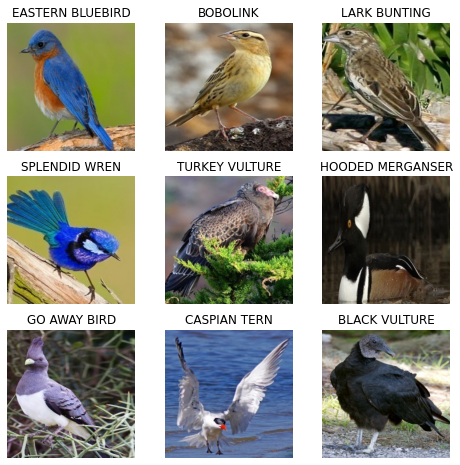

In [26]:
import random 
import matplotlib.image as mpimg

def randomBirds(ncols=3):
    fig, ax = plt.subplots(ncols=ncols, nrows=ncols, figsize=(8, 8))
    
    for i in range(ncols):
        for j in range(ncols):
            bird_species = random.choice(species)
            random_bird_path = random.choice('dataset/train/'+bird_species)
            random_bird = mpimg.imread('dataset/train/'+ bird_species + '/' + '020.jpg')
            ax[i, j].imshow(random_bird)
            ax[i, j].set_title(bird_species)
            ax[i, j].axis('off')
            
randomBirds()

#### Number of images of each species

In [27]:
# train dataset
n = []
for dirr in species: 
    list = os.listdir('dataset/train')
    n.append(len(list))

print('Train - Minimum number of images found in a class:', min(n))
print('Train - Maximum number of images found in a class:', max(n), '\n')

# test dataset
ntest = []
for dirr in species: 
    list = os.listdir('dataset/test')
    ntest.append(len(list))

print('Test - Minimum number of images found in a class:', min(ntest))
print('Test - Maximum number of images found in a class:', max(ntest), '\n')

# validation dataset
nval = []
for dirr in species:
    d = os.path.join('dataset', 'valid')    
    list = os.listdir('dataset/valid')
    nval.append(len(list))

print('Valid - Minimum number of images found in a class:', min(nval))
print('Valid - Maximum number of images found in a class:', max(nval))

Train - Minimum number of images found in a class: 250
Train - Maximum number of images found in a class: 250 

Test - Minimum number of images found in a class: 250
Test - Maximum number of images found in a class: 250 

Valid - Minimum number of images found in a class: 250
Valid - Maximum number of images found in a class: 250


#### Visual analysis of the distribuition of the images on all the datasets

{'boxes': [<matplotlib.lines.Line2D at 0x7fd7545d60d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd754fdfd90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd754e32f10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd75458db90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd7545d6350>,
  <matplotlib.lines.Line2D at 0x7fd7545d6dd0>]}

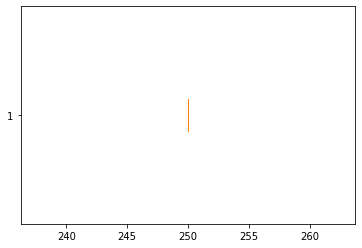

In [28]:
# train dataset
################ax5.set_title('Train Images')
fig5, ax5 = plt.subplots()
square = dict(markerfacecolor='orange')
ax5.boxplot(n, vert=False, flierprops=square)

## Load and prepare images

#### Normalization

In [32]:
datagen = ImageDataGenerator(rescale = 1./255)

In [33]:
trainData = datagen.flow_from_directory('dataset/train', target_size = (100, 100), class_mode='categorical')
steps = len(trainData)
testData = datagen.flow_from_directory('dataset/test', target_size =  (100, 100), class_mode='categorical')
testSteps = len(testData)
validData = datagen.flow_from_directory('dataset/valid', target_size =  (100, 100), class_mode='categorical')
validSteps = len(validData)

Found 35215 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.
